In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
from math import sqrt
import dtale  
import utils

<h2> Aucune valeurs manquantes dans le data set 

In [3]:
df = pd.read_csv("../heart.csv")
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<h2> Variables catégorical

In [4]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for cat in categorical_cols:
    print(cat)

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


Décomposer ces variables 

In [5]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

BoxPlot des variables numériques 

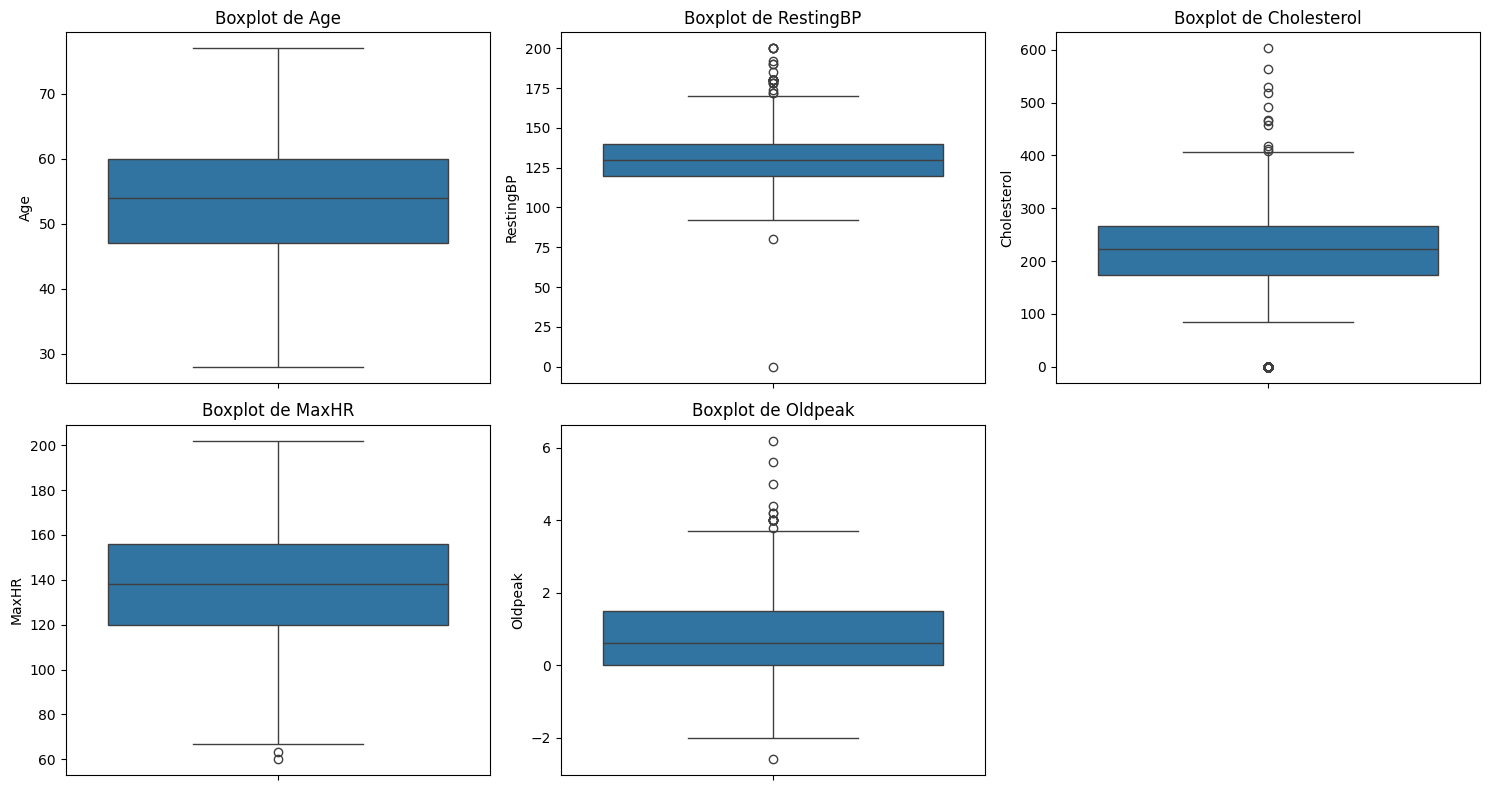

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables quantitatives initiales
quantitative_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 8))
for i, col in enumerate(quantitative_cols):
    plt.subplot(2, 3, i + 1)
    # Utilisez le DataFrame original avant encodage si vous l'avez, sinon utilisez df_encoded
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [7]:
print(f"Nombre de lignes avant la suppression : {len(df_encoded)}")
print(f"Nombre de RestingBP = 0 : {(df_encoded['RestingBP'] == 0).sum()}")

# Suppression des lignes où RestingBP est égal à 0
df_encoded = df_encoded[df_encoded['RestingBP'] != 0]

# Après la suppression
print(f"Nombre de lignes après la suppression : {len(df_encoded)}")

Nombre de lignes avant la suppression : 918
Nombre de RestingBP = 0 : 1
Nombre de lignes après la suppression : 917


<h2>Distribution

<h3> Numériques

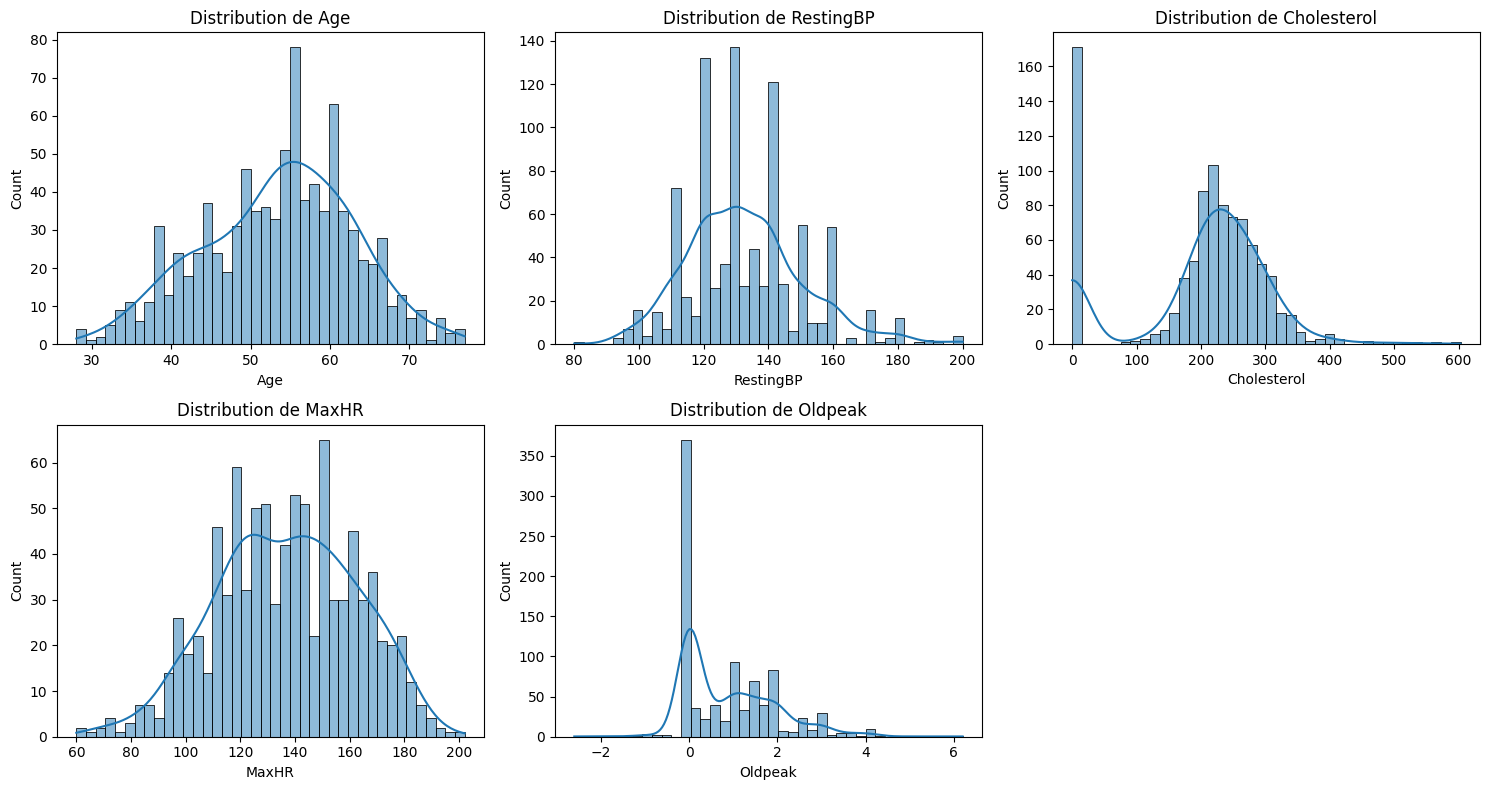

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste de vos variables quantitatives (après nettoyage RestingBP=0)
quantitative_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 8))
for i, col in enumerate(quantitative_cols):
    plt.subplot(2, 3, i + 1)
    # Utilisez un histogramme combiné à un KDE plot (courbe de densité)
    sns.histplot(df_encoded[col], kde=True, bins=40)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [9]:
print(f"Nombre de lignes avant la suppression : {len(df_encoded)}")
print(f"Nombre de RestingBP = 0 : {(df_encoded['Cholesterol'] == 0).sum()}")

# Suppression des lignes où RestingBP est égal à 0
df_encoded = df_encoded[df_encoded['Cholesterol'] != 0]

# Après la suppression
print(f"Nombre de lignes après la suppression : {len(df_encoded)}")

Nombre de lignes avant la suppression : 917
Nombre de RestingBP = 0 : 171
Nombre de lignes après la suppression : 746


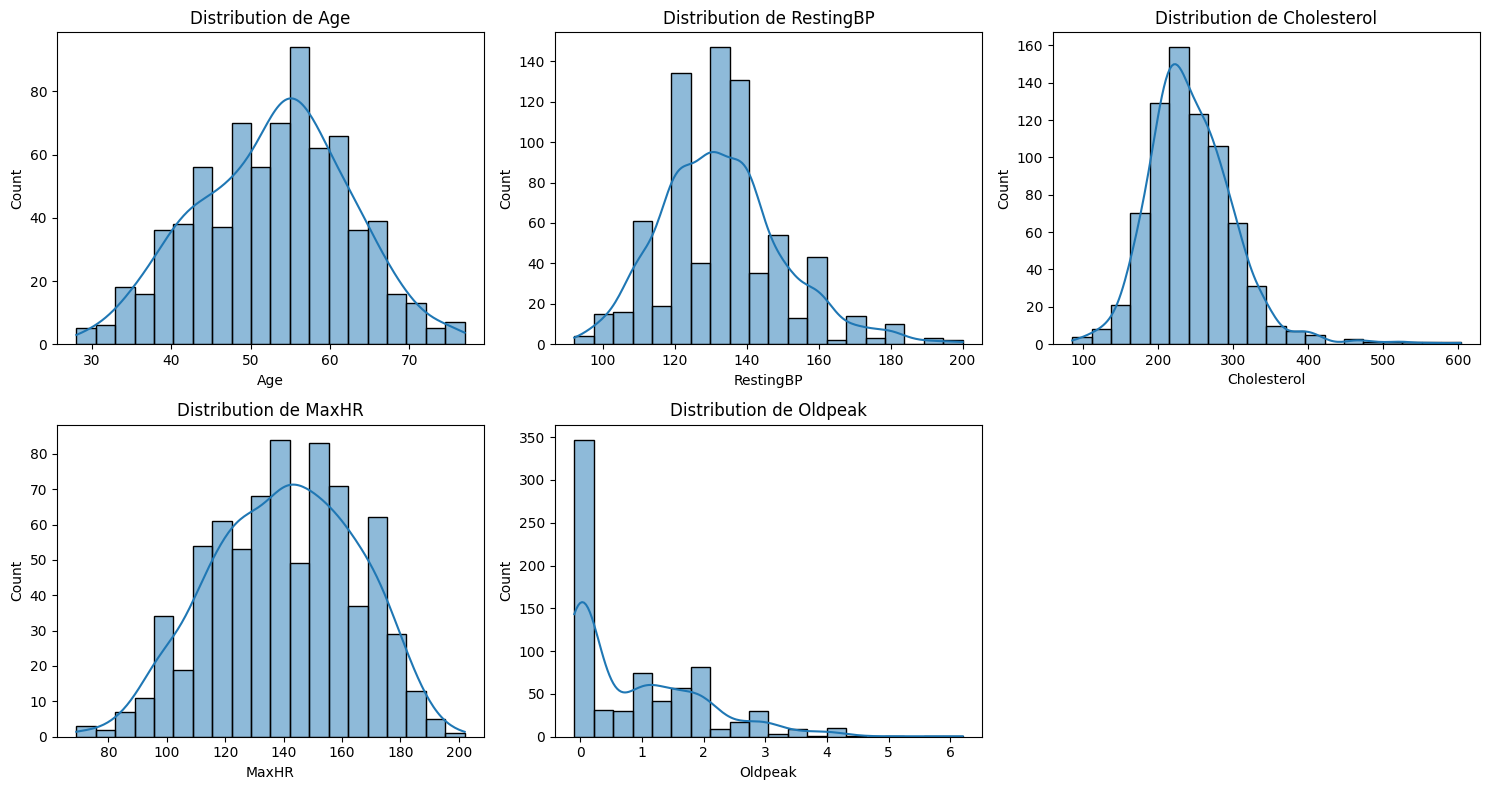

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste de vos variables quantitatives (après nettoyage RestingBP=0)
quantitative_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 8))
for i, col in enumerate(quantitative_cols):
    plt.subplot(2, 3, i + 1)
    # Utilisez un histogramme combiné à un KDE plot (courbe de densité)
    sns.histplot(df_encoded[col], kde=True, bins=20)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

<h3> Categorical

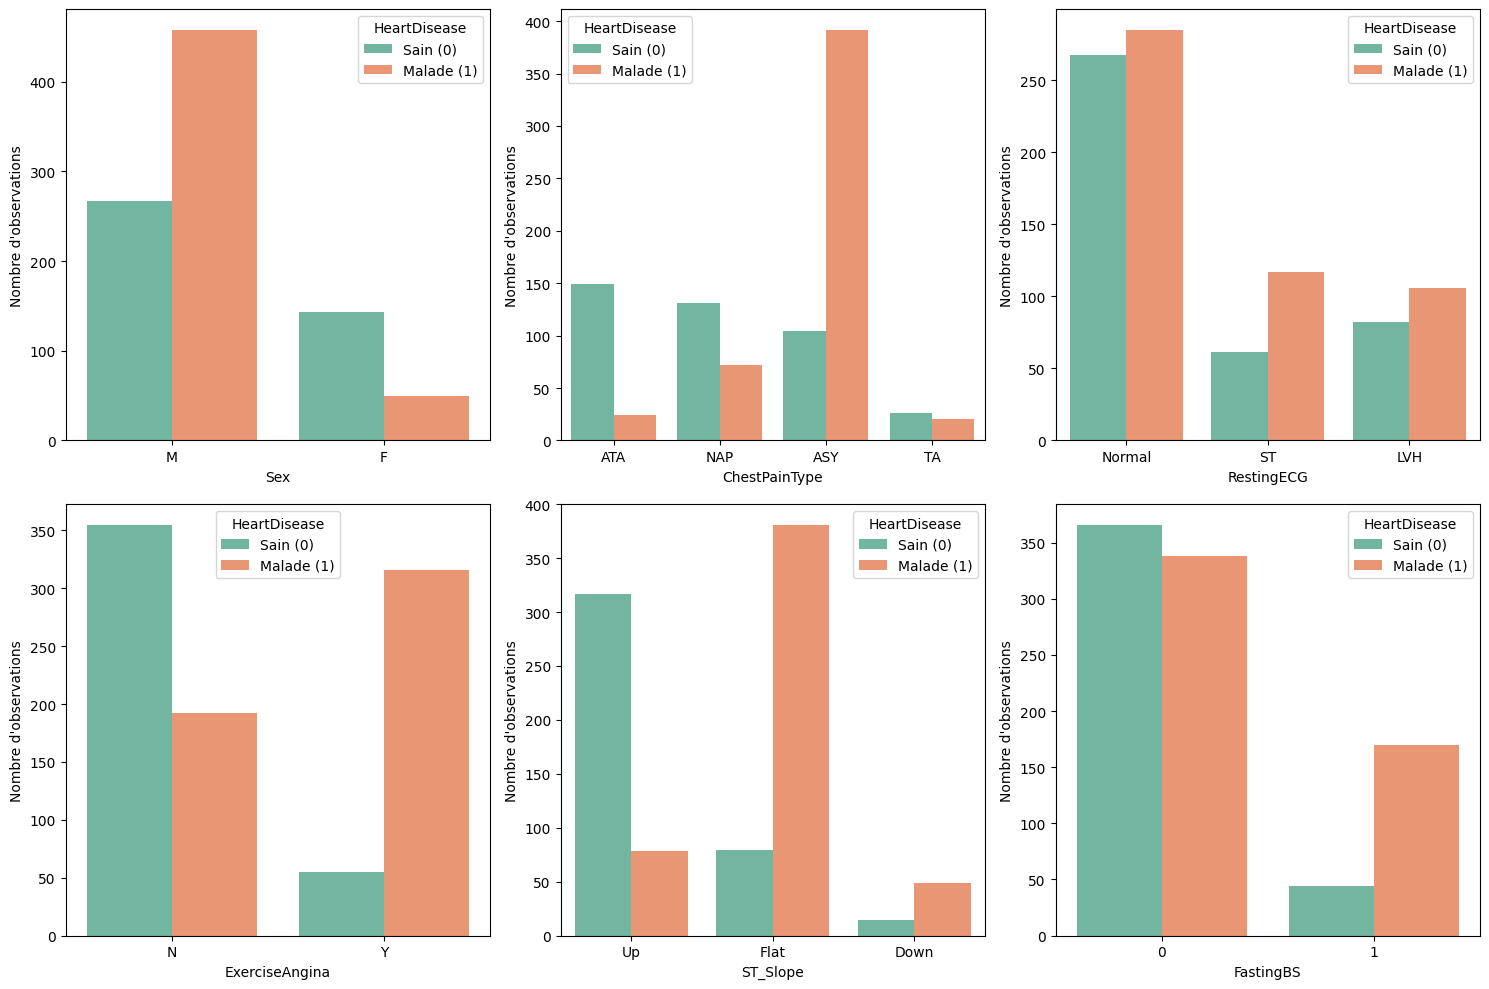

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue="HeartDisease", data=df, palette="Set2")
    plt.xlabel(col)
    plt.ylabel("Nombre d'observations")
    plt.legend(title="HeartDisease", labels=["Sain (0)", "Malade (1)"])
plt.tight_layout()
plt.show()
